# Aim
This project is intended to use FB prophet to predict sales forecast

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet
import pickle
%matplotlib inline

##### 1. Load dataset

In [2]:
Orders = pd.read_csv('Orders_1.csv')
Orders.head(1)

,row,order_priority,order_date,order_id,discount,unit_price,order_quantity,sales,shipping_cost,product_base_margin,...,city,postal_code,ship_date,ship_mode,subregion,new_order_date,year_order_date,new_discount,new_margin,profit
0,3689,Medium,28/01/2011,97,3%,3.0,26,75.66,1.0,38.0%,...,Jakarta,NaN,29/01/2011,Regular Air,NaN,2011-01-28,2011,0.03,0.38,26.3


##### 2. Prepare data
a. clean column 'order_date' so it is in the form of datatime 
b. select columns that are needed for FB prophet sales forecast

In [3]:
Sales_records = Orders[['sales','order_date']]
Sales_records['order_date'] = pd.to_datetime(Sales_records['order_date'])
Sales_records.sort_values('order_date',ascending=True,inplace=True)
Sales_records = Sales_records.groupby('order_date')['sales'].sum()
Sales_records = Sales_records.reset_index()
Sales_records.head(3)

WARNING - (py.warnings._showwarnmsg) - /Users/Jerry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

WARNING - (py.warnings._showwarnmsg) - /Users/Jerry/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,order_date,sales
0,2010-01-19,111.93
1,2010-02-12,963.30
2,2010-02-26,107.80


##### 3. Plot original data
Plot Sales along time 

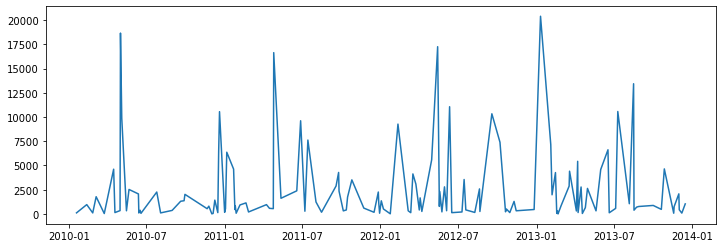

In [4]:
plt.figure(figsize=(12, 4))
plt.plot(Sales_records['order_date'], Sales_records['sales'])
plt.show()

##### 3. Prepare data for using FB Prophet 

In [5]:
# Prepare for using Prophet,
data = Sales_records[['order_date', 'sales']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

,ds,y
0,2010-01-19,111.93
1,2010-02-12,963.30
2,2010-02-26,107.80
3,2010-03-06,1777.23
4,2010-03-25,43.24


##### 4. Apply FB Prophet

In [6]:
#  Train Model
m = NeuralProphet()
model = m.fit(data, freq='D', epochs=1000) 

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/208 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.96E-02, min: 6.70E-01


  0%|          | 0/208 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.49E-01, min: 9.05E-01


  0%|          | 0/208 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.05E-02, min: 4.96E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.75E-02
Epoch[1000/1000]: 100%|█| 1000/1000 [00:33<00:00, 30.28it/s, SmoothL1Loss=0.0564


In [7]:
# Forecast 
future = m.make_future_dataframe(data, periods=3000)
future.head()

,ds,y
0,2013-12-16,None
1,2013-12-17,None
2,2013-12-18,None
3,2013-12-19,None
4,2013-12-20,None


In [8]:
# Start predicting
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2013-12-16,None,2569.553467,NaN,2128.869629,-116.928055,557.611816
1,2013-12-17,None,2118.118164,NaN,2126.478516,-16.248869,7.888607
2,2013-12-18,None,2058.429932,NaN,2124.087402,83.760628,-149.417999
3,2013-12-19,None,1936.459717,NaN,2121.696533,182.502350,-367.739258
4,2013-12-20,None,2005.081909,NaN,2119.304932,279.370789,-393.593872


##### 5. Plot FB Prophet sales forecast result 

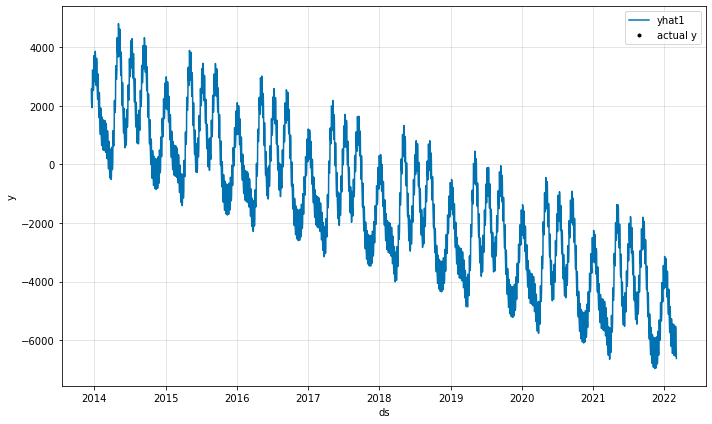

In [9]:
# Visualize prediction 
plot1 = m.plot(forecast)

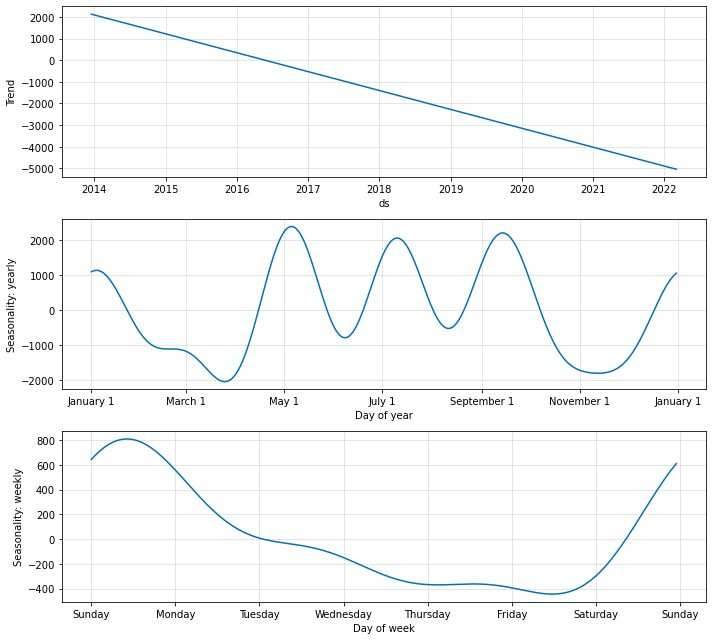

In [10]:
# Plost of forecast by Year, Month and Day
plt2 = m.plot_components(forecast)

# Conclusion
Sales is predicted to decline year after year. Sales is predicted to peak in May, July and september. In terms of prediction by day, Sunday has highest sales. 

This Result can be a red flag for sales team and sales tema can come up with solution now to not let sales decline like prediction. 